In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, train_test_split
from pandas import DataFrame, Series
from sklearn.feature_selection import RFE, RFECV, SelectFromModel
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression, Lasso, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
import platform
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

rfc = RandomForestRegressor()
xgb = XGBRegressor()
lr = LinearRegression()
lgbm = LGBMRegressor()
svc = LinearSVC()

In [2]:
y = pd.read_csv('./y_open_0905~_1000(5min)/y_open_0930.csv', index_col=0)
X = pd.read_csv('./X_Features_ver2.csv')

# 시간 형태로 변경
X['date'] = pd.to_datetime(X['date'] ,format="%Y-%m-%d")
y['date'] = pd.to_datetime(y['date'],format= "%Y%m%d")

df = pd.merge(X,y, on='date',how='inner')
df.sort_index(inplace=True)


In [3]:
df.drop(columns=['sp500_high','sp500_low','sp500_change_percentage','kodex_high', 'kodex_low', 'kodex_close',
        'kosdaq_open', 'kosdaq_high', 'kosdaq_low',
       'kosdaq_close'], inplace=True)

In [4]:
df['sp500_closing'] = df['sp500_closing'].str.replace(',', '').astype(float)
df['sp500_opening'] = df['sp500_opening'].str.replace(',', '').astype(float)

In [5]:
# y의 시점 변환
df['open']=df['open'].shift(-1)
df['kodex_open']=df['kodex_open'].shift(-1)


# index = date
df.set_index('date', inplace=True)
df.dropna(inplace=True)

# X, y 정의
y = df[['open']]
y.rename(columns={'open' : "target"})
X = df.drop(columns='open')

In [6]:
X.columns

Index(['sp500_closing', 'sp500_opening', 'krx_close', 'krx_diff', 'krx_return',
       'PER', 'PBR', 'Dividend_Yield', 'GOLD_RETURN', 'MEAL_RETURN',
       'SP_500_RETURN', 'USD_KRW_RETURN', 'VIX_RETURN', 'WTI_RETURN',
       'BTC_RETURN', 'KR_3Y', 'KR_10Y', 'USA_3Y', 'USA_10Y', 'kodex_open',
       'kodex_volume', 'kosdaq_volume', 'KODEX_return', 'Kosdaq150_return'],
      dtype='object')

In [7]:
from sklearn.feature_selection import SelectKBest, f_regression

X_selected=SelectKBest(score_func= f_regression, k=9)
X_selected.fit_transform(X,y)
features = X.columns[X_selected.get_support()]
print('features={}'.format(features))

features=Index(['sp500_closing', 'sp500_opening', 'krx_close', 'PER', 'PBR',
       'Dividend_Yield', 'KR_10Y', 'kodex_open', 'kodex_volume'],
      dtype='object')


c:\Users\hotte\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
X_scaled = X.drop(['USD_KRW_RETURN','USA_3Y','sp500_opening','Dividend_Yield','kosdaq_volume','KR_3Y','BTC_RETURN','krx_return','sp500_closing','WTI_RETURN','Kosdaq150_return','MEAL_RETURN'],axis=1)
# OLS 정보 보기 
feature_add = sm.add_constant(X_scaled, has_constant='add')
# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   open   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.387e+05
Date:                Mon, 06 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:34:54   Log-Likelihood:                -7373.3
No. Observations:                1198   AIC:                         1.477e+04
Df Residuals:                    1185   BIC:                         1.484e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -259.0910     36.343     -7.129      0.000    -330.395    -187.787
krx_close        20.7178      1.302     15.908      0.000      18.163      23.273
krx_diff        -15.4860      1.232    -12.566      0.000     -17.904     -13.068
PER               1.9331      0.795      2.433      0.015       0.374       3.492
PBR           -1639.3701    145.726    -11.250      0.000   -1925.279   -1353.461
GOLD_RETURN      -0.4828      0.205     -2.350      0.019      -0.886      -0.080
SP_500_RETURN     0.1654      0.141      1.170      0.242      -0.112       0.443
VIX_RETURN        5.7024      2.280      2.501      0.013       1.229      10.176
KR_10Y           59.4614     14.504      4.100      0.000      31.005      87.917
USA_10Y         -17.9160      8.833     -2.028      0.043     -35.247      -0.585
kodex_open        0.8400      0.010     87.483      0.000       0.821       0.859
kodex_volume   2.283e-06   8.66e-07      2.636      0.009    5.84e-07    3.98e-06
KODEX_return      0.0410      0.021      1.944      0.052      -0.000       0.082
==============================================================================
Omnibus:                       39.632   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.198
Skew:                          -0.066   Prob(JB):                     2.88e-22
Kurtosis:                       4.403   Cond. No.                     3.94e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Index(['krx_close', 'krx_diff', 'PER', 'PBR', 'GOLD_RETURN', 'SP_500_RETURN',
       'VIX_RETURN', 'KR_10Y', 'USA_10Y', 'kodex_open', 'kodex_volume',
       'KODEX_return'],
      dtype='object')

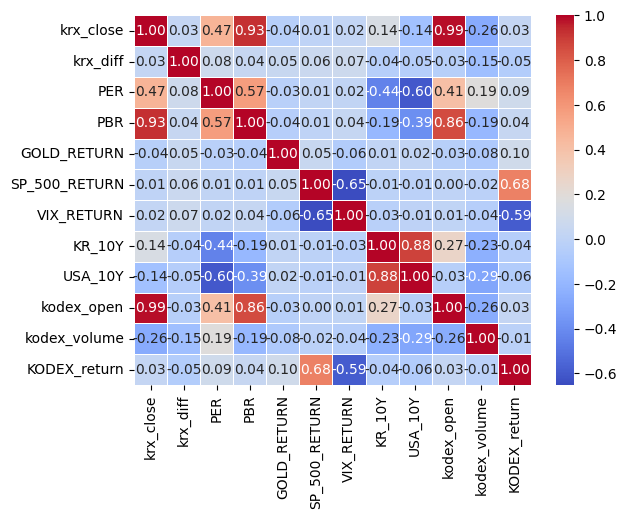

In [9]:
sns.heatmap(X_scaled.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f')
X_scaled.columns

In [10]:
df1 = df[['open', 'krx_diff', 'PER', 'GOLD_RETURN', 'SP_500_RETURN',
       'VIX_RETURN', 'USA_10Y', 'kodex_volume', 'kodex_open',
       'KODEX_return']]
np.abs(df1.corr()['open']).sort_values(ascending=False)

open             1.000000
kodex_open       0.999739
PER              0.409122
kodex_volume     0.254686
krx_diff         0.036012
GOLD_RETURN      0.035529
USA_10Y          0.033184
KODEX_return     0.028593
VIX_RETURN       0.010591
SP_500_RETURN    0.002124
Name: open, dtype: float64

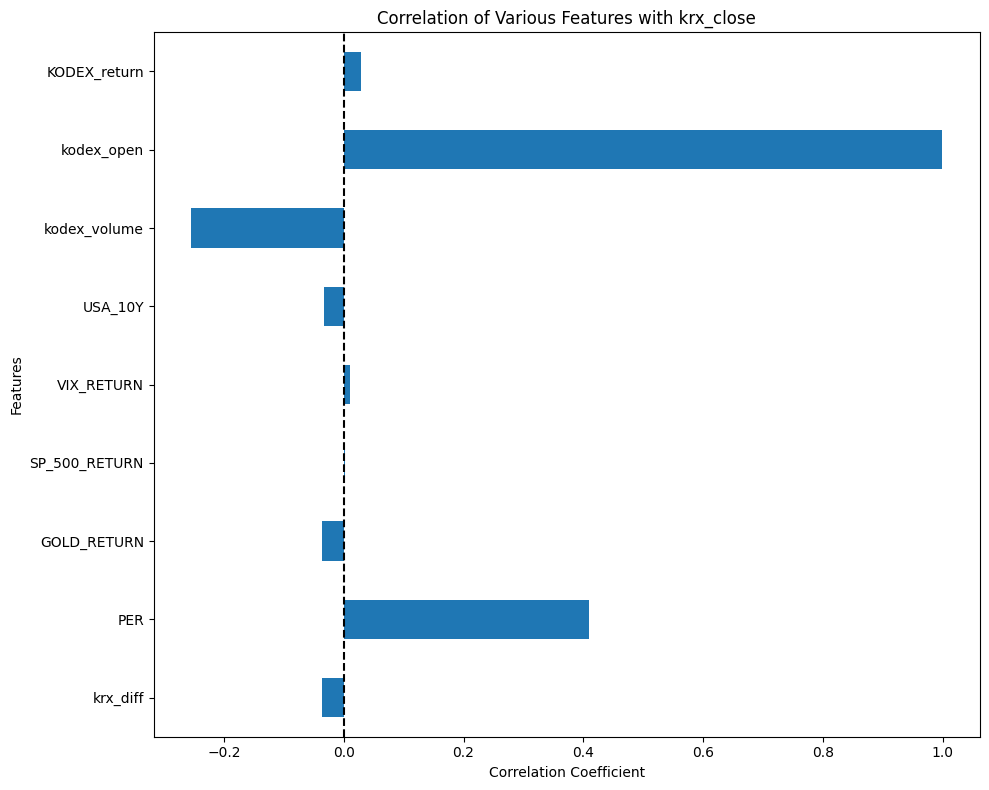

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Extract the 'krx_close' column's correlation values
krx_close_correlations = correlation_matrix['open'].drop('open')  # drop self-correlation

# Plot a horizontal bar chart for the 'krx_close' correlations
plt.figure(figsize=(10, 8))
krx_close_correlations.plot(kind='barh')  # Change to horizontal bar chart
plt.title('Correlation of Various Features with krx_close')
plt.ylabel('Features')
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='k', linestyle='--')  # Add a vertical line at zero
plt.tight_layout()  # Adjust the layout

# Show the plot
plt.show()

In [12]:
# Select only numeric columns (excluding 'open' which is the target variable)
numeric_cols = df1.select_dtypes(include='number').columns.tolist()
numeric_cols.remove('open')  # Remove the target variable from the list

# Calculate VIF for each feature
VIF_data = pd.DataFrame()
VIF_data['feature'] = numeric_cols
VIF_data['VIF'] = [variance_inflation_factor(df[numeric_cols].values, i) for i in range(len(numeric_cols))]

# Display the VIF values
VIF_data.sort_values(by='VIF', ascending=False)


,feature,VIF
7,kodex_open,26.008762
1,PER,14.004604
5,USA_10Y,6.956141
6,kodex_volume,3.545240
3,SP_500_RETURN,2.359746
8,KODEX_return,2.105534
4,VIX_RETURN,1.932101
0,krx_diff,1.084592
2,GOLD_RETURN,1.018114


In [13]:
df1.drop(columns='open').to_csv('./X_Features_Final.csv')

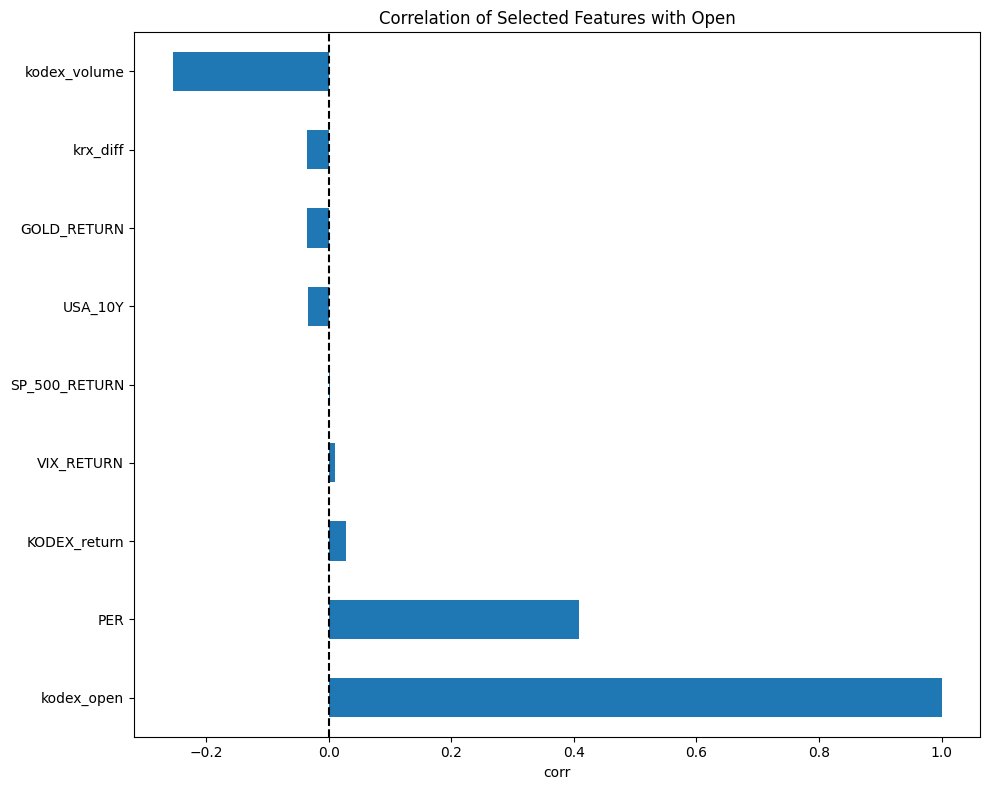

In [14]:
# 상관 계수 행렬 계산: 'open'을 포함한 감소된 데이터프레임
correlation_matrix_reduced_kor = df1.corr()

# 'open'과의 상관관계 추출 및 정렬
open_correlations_kor = correlation_matrix_reduced_kor['open'].drop('open').sort_values(ascending=False)

# 'open'과의 상관관계에 대한 바 차트 그리기
plt.figure(figsize=(10, 8))
open_correlations_kor.plot(kind='barh')
plt.title('Correlation of Selected Features with Open')
plt.xlabel('corr')
plt.axvline(x=0, color='k', linestyle='--')  # 0에 수직선 추가
plt.tight_layout()  # 레이아웃 조정

# 그래프 표시
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
# df 날짜 정렬
df1.sort_index(inplace=True)
# X와 y 정의
X = df1.drop('open', axis=1)
y = df1['open']

# 분리 전 백테스트를 위한 date 생성
dates = df1.index

# 학습셋 분리 (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=42)


# StandardScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델
linear_regression_model = LinearRegression()

# Fit model
linear_regression_model.fit(X_train, y_train)

# Predict test
y_pred = linear_regression_model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

mse, rmse , r2



C:\Users\hotte\AppData\Local\Temp\ipykernel_19292\1732833741.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_index(inplace=True)


(16139.287821537691, 127.04049677775072, 0.9947339748471271)

In [16]:
# 백테스트 날짜와 함께 결과 DataFrame 생성
results_df = pd.DataFrame({
    'date': dates[-len(y_pred):],  # 테스트 세트와 동일한 길이의 날짜 데이터
    'y_test': y_test.values,  # y_test를 1차원 배열로 변환
    'y_pred': y_pred  # y_pred는 이미 1차원 배열임
})
results_df.set_index('date', inplace=True)
mse, rmse, r2, results_df.head()


(16139.287821537691,
 127.04049677775072,
 0.9947339748471271,
              y_test        y_pred
 date                             
 2022-04-18  34896.0  35031.052463
 2022-04-19  34477.0  34353.862114
 2022-04-20  34901.0  34605.536856
 2022-04-21  34723.0  34874.357221
 2022-04-22  35084.0  34973.816808)

In [124]:
backtest_open = pd.read_csv('./backtest/kodex_open.csv')
backtest_open['date'] = pd.to_datetime(backtest_open['date'],format= "%Y%m%d")
backtest_open.set_index('date', inplace=True)
backtest_open

,open
date,
2002-10-14,5354.0
2002-10-15,5483.0
2002-10-16,5442.0
2002-10-17,5661.0
2002-10-18,5729.0
...,...
2023-10-19,32175.0
2023-10-20,31905.0
2023-10-23,31920.0


In [125]:
backtesting = pd.merge(results_df,backtest_open, right_index=True,left_index=True, how='inner')

In [126]:
backtesting

,y_test,y_pred,open
date,,,
2022-10-19,28724.0,28874.761678,28426.0
2022-10-20,28842.0,28821.228811,28225.0
2022-10-21,28328.0,28454.638478,28812.0
2022-10-24,28357.0,28230.518621,28670.0
2022-10-25,28807.0,28810.519047,28666.0
...,...,...,...
2023-10-19,32900.0,32816.977264,32175.0
2023-10-20,32515.0,32624.186913,31905.0
2023-10-23,31980.0,32177.092296,31920.0


In [127]:
backtesting.to_csv('./backtest/back_test_1.csv')

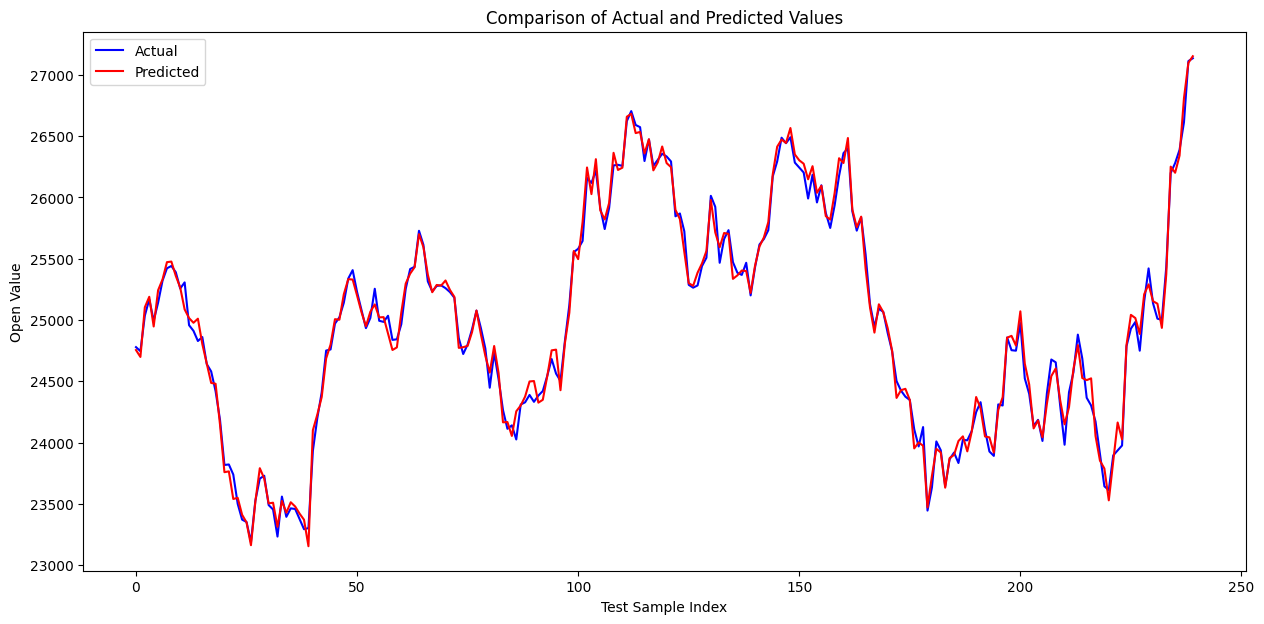

In [48]:
import matplotlib.pyplot as plt

# 실제값과 예측값을 시각화하기 위한 인덱스 생성
test_indices = range(len(y_test))

plt.figure(figsize=(15, 7))
plt.plot(test_indices, y_test, label='Actual', color='blue')
plt.plot(test_indices, y_pred.flatten(), label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Test Sample Index')
plt.ylabel('Open Value')
plt.legend()
plt.show()


In [18]:
# 데이터셋을 다시 로드하고, 'date' 컬럼을 datetime으로 변환한 후 인덱스로 설정합니다.
df1 = df1.reset_index()
df1['date'] = pd.to_datetime(df1['date'])
df1.set_index('date', inplace=True)

# 연도별로 데이터프레임을 분리합니다.
years = df1.index.year.unique()  # 연도별로 유니크한 값을 추출합니다.
yearly_dfs = {year: df1[df1.index.year == year] for year in years}  # 연도별 데이터프레임을 생성합니다.

# 2023년 데이터프레임을 예로 들어 확인해 봅니다.
yearly_dfs[2023].head(10)  # 2023년 데이터프레임의 처음 몇 행을 출력합니다.



,open,krx_diff,PER,GOLD_RETURN,SP_500_RETURN,VIX_RETURN,USA_10Y,kodex_volume,kodex_open,KODEX_return
date,,,,,,,,,,
2023-10-25,31810.0,-1.94,16.06,13.5,-46,0.80,4.961,3758074,31920.0,-485.0
2023-10-24,31845.0,2.93,16.16,1.7,12,-1.06,4.819,5387775,31905.0,90.0
2023-10-23,31980.0,-2.46,16.01,0.3,7,-1.46,4.848,3815317,32175.0,150.0
2023-10-20,32515.0,-4.80,16.14,6.4,-49,0.12,4.914,5747441,32635.0,-35.0
2023-10-19,32900.0,-6.06,16.38,20.4,-43,1.67,4.990,5179844,32835.0,-255.0
2023-10-18,32815.0,1.47,16.69,31.6,-43,0.86,4.911,5119785,32750.0,-425.0
2023-10-17,32635.0,4.06,16.62,2.4,28,0.47,4.836,4094158,32610.0,-85.0
2023-10-16,32780.0,-2.48,16.41,-7.0,31,-1.89,4.700,4402616,32755.0,230.0
2023-10-13,32975.0,-3.08,16.54,59.8,-33,2.79,4.616,3346991,32865.0,-160.0


In [19]:
# X와 y 정의
X = yearly_dfs[2020].drop('open', axis=1)
y = yearly_dfs[2020]['open']

# 학습셋 분리 (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False, random_state=42)

# 모델
linear_regression_model = LinearRegression()

# Fit model
linear_regression_model.fit(X_train, y_train)

# Predict test
y_pred = linear_regression_model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(45759.255970169244, 0.9746380151770923)

In [20]:
# tensorflow device 확인
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1633765429267395740
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2249719808
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9521025981020608114
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:06:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [21]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# X와 y 정의
X = df1.drop('open', axis=1)
y = df1['open']

# 학습셋 분리 (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False, random_state=42)

# 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LSTM에 맞는 데이터 형태로 변환: [samples, time steps, features]
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# LSTM 모델 설계
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 학습
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

# 성능 평가
predicted = model.predict(X_test_scaled)
mse_lstm = mean_squared_error(y_test, predicted)
r2_lstm = r2_score(y_test, predicted)

mse_lstm, r2_lstm


Epoch 1/100
30/30 [==============================] - 18s 96ms/step - loss: 1104539904.0000 - val_loss: 624305856.0000
Epoch 2/100
30/30 [==============================] - 0s 14ms/step - loss: 1104486016.0000 - val_loss: 624232640.0000
Epoch 3/100
30/30 [==============================] - 0s 11ms/step - loss: 1104268032.0000 - val_loss: 624006272.0000
Epoch 4/100
30/30 [==============================] - 0s 10ms/step - loss: 1103932928.0000 - val_loss: 623773120.0000
Epoch 5/100
30/30 [==============================] - 0s 10ms/step - loss: 1103697920.0000 - val_loss: 623625280.0000
Epoch 6/100
30/30 [==============================] - 0s 10ms/step - loss: 1103543168.0000 - val_loss: 623518592.0000
Epoch 7/100
30/30 [==============================] - 0s 10ms/step - loss: 1103420160.0000 - val_loss: 623428224.0000
Epoch 8/100
30/30 [==============================] - 0s 10ms/step - loss: 1103310720.0000 - val_loss: 623346112.0000
Epoch 9/100
30/30 [==============================] - 0s 10ms/st

(617782037.6359146, -785.2732407088421)